<a href="https://colab.research.google.com/github/22130056-HoHoangDuy/Labs_ML/blob/main/22130056_HoHoangDuy_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [232]:
#Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

In [233]:
#Connect to Drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML_Labs_Datasets'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ML_Labs_Datasets


In [234]:
#Task1
iris = load_iris(as_frame=True)
print(iris.keys())
X = iris.data
y = iris.target

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


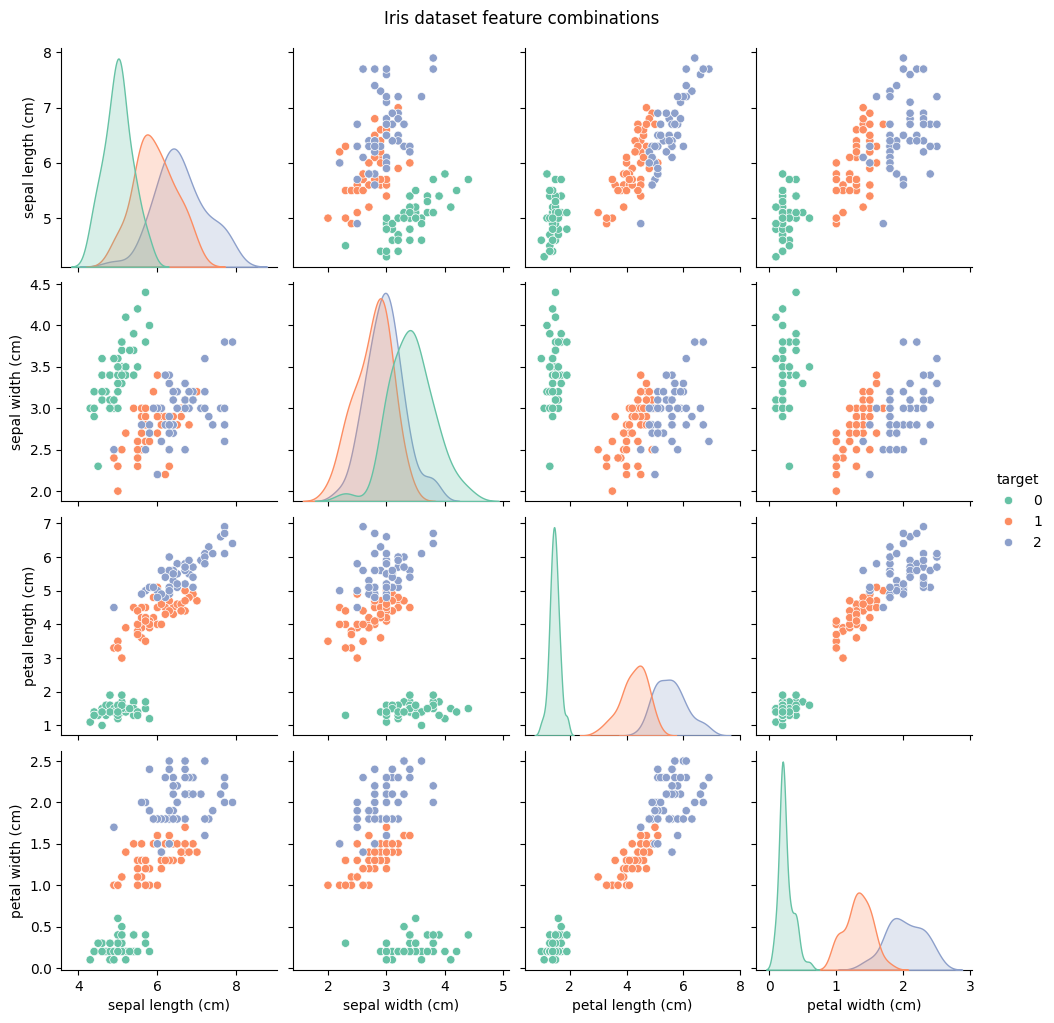

In [235]:
#Task1.1
sns.pairplot(iris.frame, hue='target', palette="Set2", diag_kind='kde')
plt.suptitle('Iris dataset feature combinations', y=1.02)
plt.show()

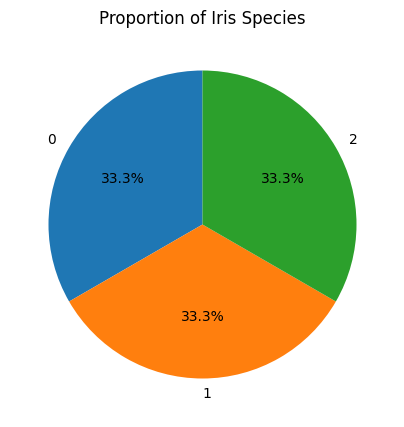

In [236]:
#Task1.2
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
species_counts = df['species'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Iris Species')
plt.show()

Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



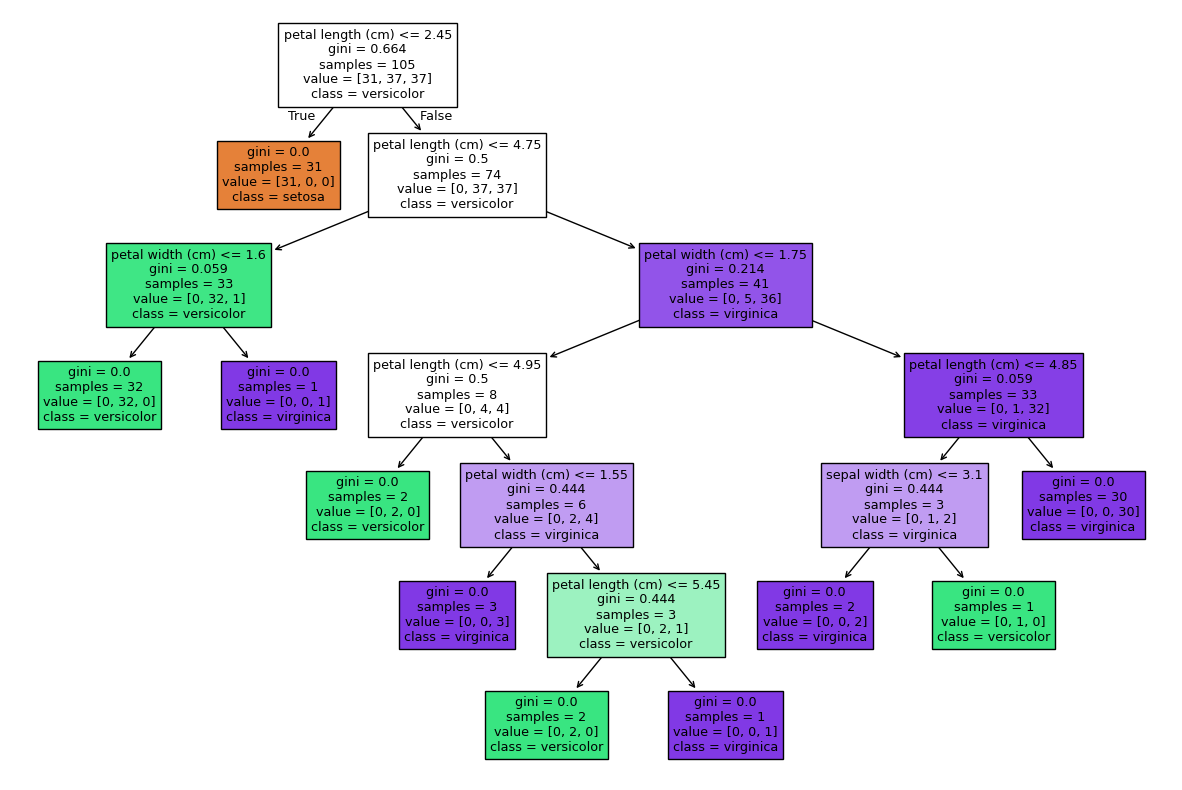

In [237]:
#Task1.3
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
plt.figure(figsize=(15, 10))
tree.plot_tree(model, feature_names=X.columns, class_names=data.target_names, filled=True)
plt.show()

In [238]:
#Task1.4
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Model Coeficients:")
print(model.coef_)



Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Model Coeficients:
[[-0.40538561  0.86892188 -2.277875   -0.95680118]
 [ 0.4664269  -0.37487908 -0.18745251 -0.72127094]
 [-0.06104129 -0.4940428   2.46532752  1.67807213]]


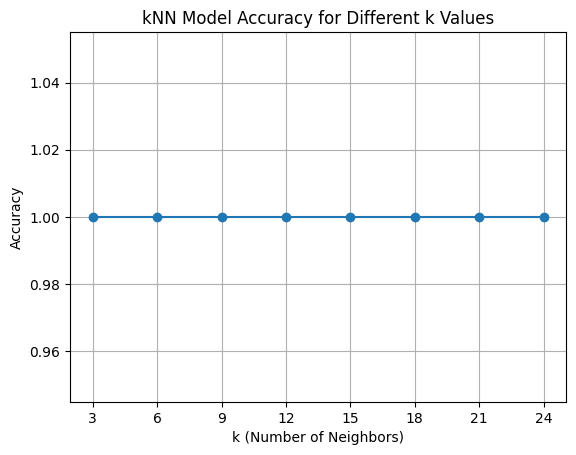

Best k value: 3


In [239]:
#Task1.5
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
k_values = range(3,27,3)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies, marker='o')
plt.title('kNN Model Accuracy for Different k Values')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(accuracies)]
print(f"Best k value: {best_k}")

In [240]:
#Task1.6
data = load_iris()
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "k-Nearest Neighbors k=3": KNeighborsClassifier(n_neighbors=3)
}
table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision (macro)", "Recall (macro)", "F1-score (macro)"]

for model_name, model in model.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    table.add_row([model_name, accuracy, precision, recall, f1])
print(table)

+-------------------------+----------+-------------------+----------------+------------------+
|          Model          | Accuracy | Precision (macro) | Recall (macro) | F1-score (macro) |
+-------------------------+----------+-------------------+----------------+------------------+
|      Decision Tree      |   1.0    |        1.0        |      1.0       |       1.0        |
|   Logistic Regression   |   1.0    |        1.0        |      1.0       |       1.0        |
| k-Nearest Neighbors k=3 |   1.0    |        1.0        |      1.0       |       1.0        |
+-------------------------+----------+-------------------+----------------+------------------+


In [241]:
#Task2
df = pd.read_csv('songs.csv', encoding = 'latin1')
df.head()

,year,songtitle,artistname,songID,artistID,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,...,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
0,2010,This Is the House That Doubt Built,A Day to Remember,SOBGGAB12C5664F054,AROBSHL1187B9AFB01,3,0.853,-4.262,91.525,0.953,...,82.475,-52.025,39.116,-35.368,71.642,-126.440,18.658,-44.770,25.989,0
1,2010,Sticks & Bricks,A Day to Remember,SOPAQHU1315CD47F31,AROBSHL1187B9AFB01,4,1.000,-4.051,140.048,0.921,...,106.918,-61.320,35.378,-81.928,74.574,-103.808,121.935,-38.892,22.513,0
2,2010,All I Want,A Day to Remember,SOOIZOU1376E7C6386,AROBSHL1187B9AFB01,4,1.000,-3.571,160.512,0.489,...,80.621,-59.773,45.979,-46.293,59.904,-108.313,33.300,-43.733,25.744,0
3,2010,It's Complicated,A Day to Remember,SODRYWD1315CD49DBE,AROBSHL1187B9AFB01,4,1.000,-3.815,97.525,0.794,...,96.675,-78.660,41.088,-49.194,95.440,-102.676,46.422,-59.439,37.082,0
4,2010,2nd Sucks,A Day to Remember,SOICMQB1315CD46EE3,AROBSHL1187B9AFB01,4,0.788,-4.707,140.053,0.286,...,110.332,-56.450,37.555,-48.588,67.570,-52.796,22.888,-50.414,32.758,0


In [242]:
#Task2.1
SongsTrain = df[df['year'] <= 2009]
SongsTest = df[df['year'] == 2010]
print("SongsTrain shape:", SongsTrain.shape)
print("SongsTest shape:", SongsTest.shape)

SongsTrain shape: (7201, 39)
SongsTest shape: (373, 39)


In [243]:
#Task2.2
SongsTrain = SongsTrain.drop(columns=['year', 'songtitle', 'artistname', 'songID', 'artistID'])
SongsTest = SongsTest.drop(columns=['year', 'songtitle', 'artistname', 'songID', 'artistID'])

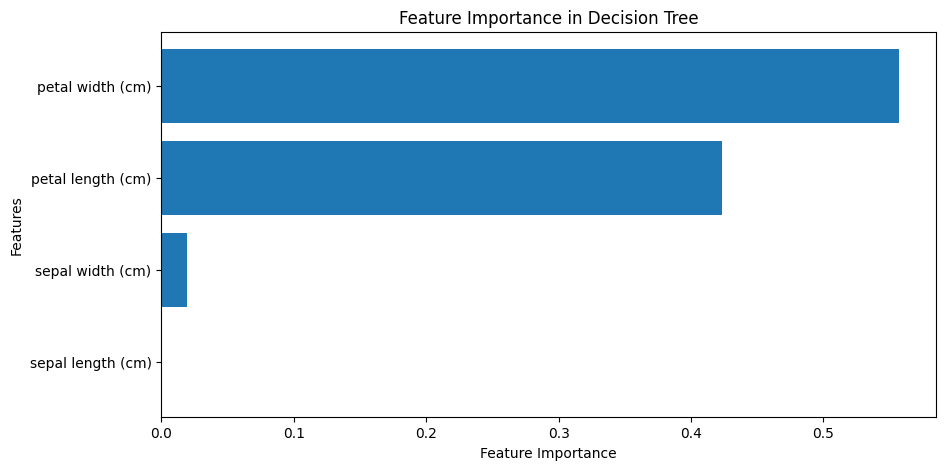

In [244]:
#Task2.3
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
plt.figure(figsize=(10, 5))
feature_names = data.feature_names if 'data' in globals() and hasattr(data, 'feature_names') else [f'Feature {i}' for i in range(X_train.shape[1])]
plt.barh(feature_names, dt_model.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree")
plt.show()

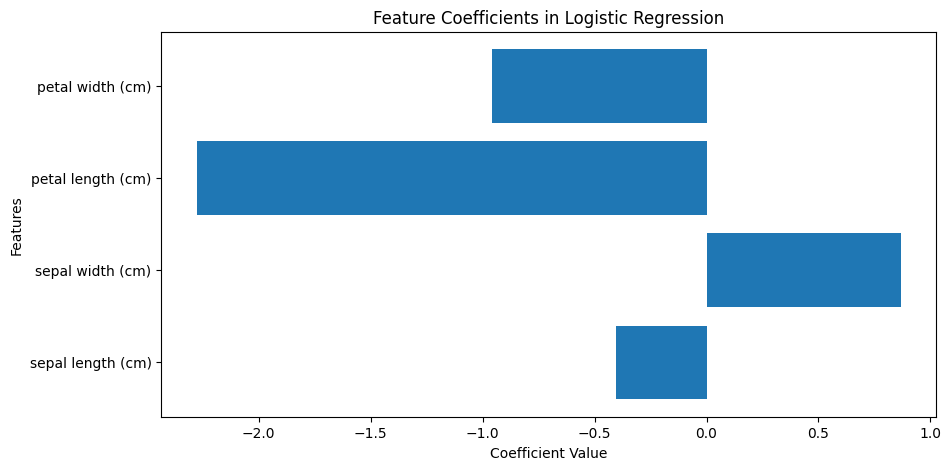

In [245]:
#Task2.4
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
plt.figure(figsize=(10, 5))
feature_names = data.feature_names if 'data' in globals() and hasattr(data, 'feature_names') else [f'Feature {i}' for i in range(X_train.shape[1])]
plt.barh(feature_names, lr_model.coef_[0])
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("Feature Coefficients in Logistic Regression")
plt.show()

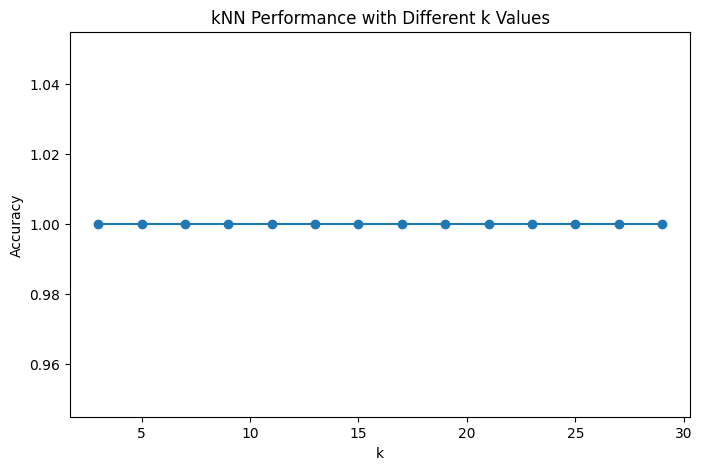

In [246]:
#Task2.5
k_values = list(range(3, 30, 2))
k_scores = []
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    knn_pred = knn_model.predict(X_test)
    k_scores.append(accuracy_score(y_test, knn_pred))
best_k = k_values[np.argmax(k_scores)]
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
plt.figure(figsize=(8, 5))
plt.plot(k_values, k_scores, marker='o', linestyle='-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('kNN Performance with Different k Values')
plt.show()

In [247]:
#Task2.6
models = {"Decision Tree": dt_pred, "Logistic Regression": lr_pred, f"kNN (k={best_k})": knn_pred}
table = PrettyTable(["Model", "Accuracy", "Precision", "Recall", "F1-score"])
for model_name, preds in models.items():
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='macro')
    rec = recall_score(y_test, preds, average='macro')
    f1 = f1_score(y_test, preds, average='macro')
    table.add_row([model_name, round(acc, 4), round(prec, 4), round(rec, 4), round(f1, 4)])
print(table)

+---------------------+----------+-----------+--------+----------+
|        Model        | Accuracy | Precision | Recall | F1-score |
+---------------------+----------+-----------+--------+----------+
|    Decision Tree    |   1.0    |    1.0    |  1.0   |   1.0    |
| Logistic Regression |   1.0    |    1.0    |  1.0   |   1.0    |
|      kNN (k=3)      |   1.0    |    1.0    |  1.0   |   1.0    |
+---------------------+----------+-----------+--------+----------+


In [248]:
#Task2.7
k_best = min(4, X_train.shape[1])
selector = SelectKBest(score_func=f_classif, k=k_best)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
dt_model.fit(X_train_selected, y_train)
dt_pred_selected = dt_model.predict(X_test_selected)
lr_model.fit(X_train_selected, y_train)
lr_pred_selected = lr_model.predict(X_test_selected)
knn_model.fit(X_train_selected, y_train)
knn_pred_selected = knn_model.predict(X_test_selected)

In [249]:
#Task2.8
models_selected = {"Decision Tree (Selected)": dt_pred_selected,
                   "Logistic Regression (Selected)": lr_pred_selected,
                   f"kNN (k={best_k}) (Selected)": knn_pred_selected}
table_selected = PrettyTable(["Model", "Accuracy", "Precision", "Recall", "F1-score"])
for model_name, preds in models_selected.items():
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='macro')
    rec = recall_score(y_test, preds, average='macro')
    f1 = f1_score(y_test, preds, average='macro')
    table_selected.add_row([model_name, round(acc, 4), round(prec, 4), round(rec, 4), round(f1, 4)])
print("\nPerformance After Feature Selection:")
print(table_selected)


Performance After Feature Selection:
+--------------------------------+----------+-----------+--------+----------+
|             Model              | Accuracy | Precision | Recall | F1-score |
+--------------------------------+----------+-----------+--------+----------+
|    Decision Tree (Selected)    |   1.0    |    1.0    |  1.0   |   1.0    |
| Logistic Regression (Selected) |   1.0    |    1.0    |  1.0   |   1.0    |
|      kNN (k=3) (Selected)      |   1.0    |    1.0    |  1.0   |   1.0    |
+--------------------------------+----------+-----------+--------+----------+


In [250]:
#Task3
df = pd.read_csv('spambase.csv', encoding = 'latin1')
df.head()
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

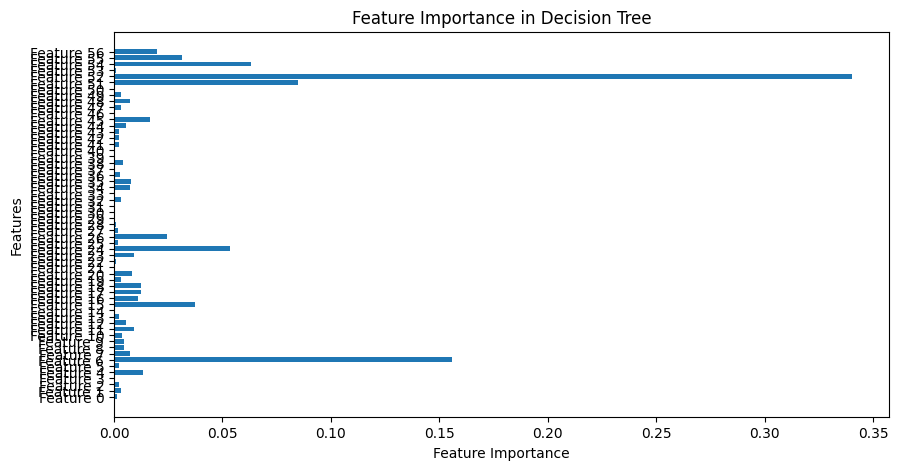

In [251]:
#Task3.1
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
plt.figure(figsize=(10, 5))
feature_importances = dt_model.feature_importances_
feature_names = [f'Feature {i}' for i in range(X.shape[1])]
plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree")
plt.show()

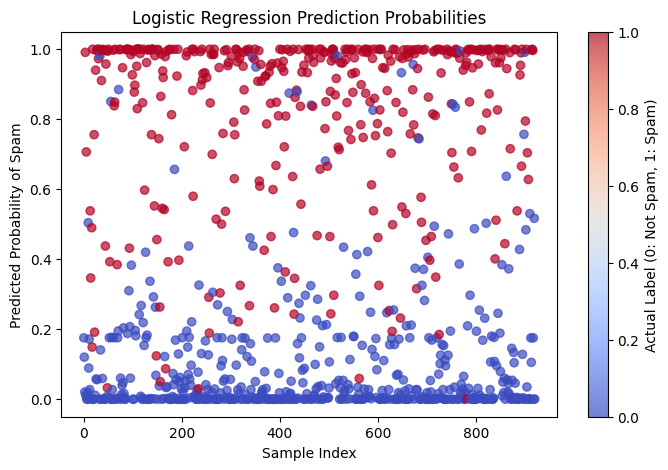

In [252]:
#Task3.2
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_probs = lr_model.predict_proba(X_test)[:, 1]
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_test)), lr_probs, c=y_test, cmap='coolwarm', alpha=0.7)
plt.xlabel("Sample Index")
plt.ylabel("Predicted Probability of Spam")
plt.title("Logistic Regression Prediction Probabilities")
plt.colorbar(label="Actual Label (0: Not Spam, 1: Spam)")
plt.show()

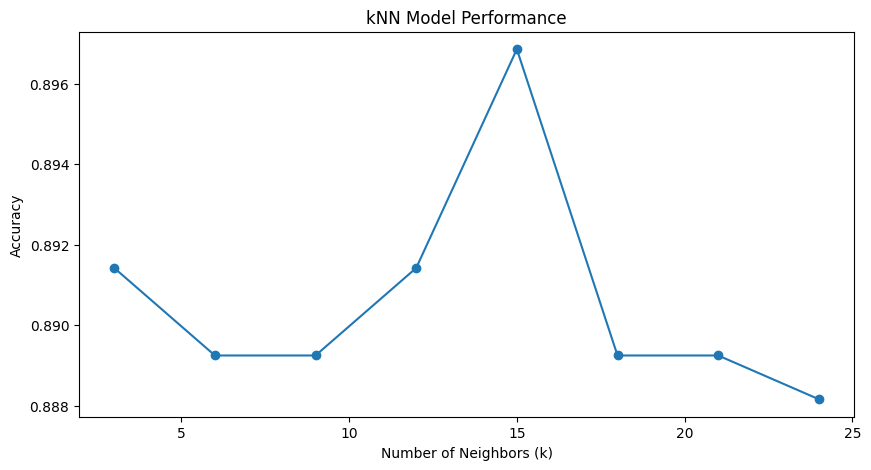

In [253]:
#Task3.3
k_values = list(range(3, 27, 3))
k_accuracies = []
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    knn_pred = knn_model.predict(X_test)
    k_accuracies.append(accuracy_score(y_test, knn_pred))
plt.figure(figsize=(10, 5))
plt.plot(k_values, k_accuracies, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("kNN Model Performance")
plt.show()
best_k = k_values[np.argmax(k_accuracies)]
knn_best_model = KNeighborsClassifier(n_neighbors=best_k)
knn_best_model.fit(X_train, y_train)
knn_best_pred = knn_best_model.predict(X_test)

In [254]:
#Task3.4
models = {"Decision Tree": dt_pred, "Logistic Regression": lr_pred, f"kNN (k={best_k})": knn_best_pred}
table = PrettyTable(["Model", "Accuracy", "Precision", "Recall", "F1-score"])
for model_name, preds in models.items():
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    table.add_row([model_name, round(acc, 4), round(prec, 4), round(rec, 4), round(f1, 4)])
print("\nPerformance Comparison:")
print(table)


Performance Comparison:
+---------------------+----------+-----------+--------+----------+
|        Model        | Accuracy | Precision | Recall | F1-score |
+---------------------+----------+-----------+--------+----------+
|    Decision Tree    |  0.9197  |   0.9247  | 0.8821 |  0.9029  |
| Logistic Regression |  0.9197  |   0.9317  | 0.8744 |  0.9021  |
|      kNN (k=15)     |  0.8969  |   0.9202  | 0.8282 |  0.8718  |
+---------------------+----------+-----------+--------+----------+


In [255]:
#Task3.5
selector = SelectKBest(f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
dt_model.fit(X_train_selected, y_train)
dt_pred_selected = dt_model.predict(X_test_selected)
lr_model.fit(X_train_selected, y_train)
lr_pred_selected = lr_model.predict(X_test_selected)
knn_best_model.fit(X_train_selected, y_train)
knn_best_pred_selected = knn_best_model.predict(X_test_selected)

In [256]:
#Task3.6
models_selected = {"Decision Tree": dt_pred_selected, "Logistic Regression": lr_pred_selected, f"kNN (k={best_k})": knn_best_pred_selected}
table_selected = PrettyTable(["Model", "Accuracy", "Precision", "Recall", "F1-score"])
for model_name, preds in models_selected.items():
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    table_selected.add_row([model_name, round(acc, 4), round(prec, 4), round(rec, 4), round(f1, 4)])
print("\nPerformance Comparison After Feature Selection:")
print(table_selected)


Performance Comparison After Feature Selection:
+---------------------+----------+-----------+--------+----------+
|        Model        | Accuracy | Precision | Recall | F1-score |
+---------------------+----------+-----------+--------+----------+
|    Decision Tree    |  0.8871  |   0.8705  | 0.8615 |  0.866   |
| Logistic Regression |  0.8686  |   0.9113  | 0.7641 |  0.8312  |
|      kNN (k=15)     |  0.8838  |   0.915   |  0.8   |  0.8536  |
+---------------------+----------+-----------+--------+----------+
